# Active, Deaths and Recovered cases plot of different Indian States 

In [1]:
# Importing libraries
import pandas as pd
import operator
from datetime import datetime
from matplotlib.dates import DateFormatter
import math
import matplotlib.pyplot as plt

In [2]:
# Getting daily covid data statewise
StateDailydf = pd.read_csv('https://api.covid19india.org/csv/latest/state_wise_daily.csv')
StateDailydf.fillna(0, inplace=True)
StateDailydf

Date     Status    TT  AN  AP  AR  AS  BR  CH  CT  ...  PY   PB  \
0    14-Mar-20  Confirmed    81   0   1   0   0   0   0   0  ...   0    1   
1    14-Mar-20  Recovered     9   0   0   0   0   0   0   0  ...   0    0   
2    14-Mar-20   Deceased     2   0   0   0   0   0   0   0  ...   0    0   
3    15-Mar-20  Confirmed    27   0   0   0   0   0   0   0  ...   0    0   
4    15-Mar-20  Recovered     4   0   0   0   0   0   0   0  ...   0    0   
..         ...        ...   ...  ..  ..  ..  ..  ..  ..  ..  ...  ..  ...   
196  18-May-20  Recovered  2482   0  96   0   0  44   3   0  ...   0  181   
197  18-May-20   Deceased   131   0   0   0   2   1   0   0  ...   0    2   
198  19-May-20  Confirmed  5327   0  57   0  42  96   3   0  ...   5   22   
199  19-May-20  Recovered  3030   0  69   0   0   0   3   0  ...   1   95   
200  19-May-20   Deceased   145   0   2   0   0   0   0   0  ...   0    1   

      RJ  SK   TN  TG  TR   UP  UT   WB  
0      3   0    1   1   0   12   0    0  
1      1   0    0   0   0    4   0    0  
2      0   0    0   0   0    0   0    0  
3      1   0    0   2   0    1   0    0  
4      2   0    0   1   0    0   0    0  
..   ...  ..  ...  ..  ..  ...  ..  ...  
196  163   0  234  10   4  147   0   47  
197    7   0    3   0   0    6   0    6  
198  338   0  688  42   4  321  15  137  
199  119   0  489   9  27  135   0   68  
200    5   0    3   4   0    5   0    6  

[201 rows x 40 columns]

In [3]:
# Setting begin date and end date
dfshape = StateDailydf.shape
BeginDate = datetime.strptime(StateDailydf['Date'][0],'%d-%b-%y').strftime("%d %B %Y")
EndDate = datetime.strptime(StateDailydf['Date'][dfshape[0]-1],'%d-%b-%y').strftime("%d %B %Y")
print(BeginDate)
print(EndDate)


14 March 2020
19 May 2020


In [4]:
# All states are mentioned as column name in coded form
StateDailydf.columns

Index(['Date', 'Status', 'TT', 'AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DN',
       'DD', 'DL', 'GA', 'GJ', 'HR', 'HP', 'JK', 'JH', 'KA', 'KL', 'LA', 'LD',
       'MP', 'MH', 'MN', 'ML', 'MZ', 'NL', 'OR', 'PY', 'PB', 'RJ', 'SK', 'TN',
       'TG', 'TR', 'UP', 'UT', 'WB'],
      dtype='object')

In [5]:
# Defining a dictionary for state name corresponding to their codes

statesUT = {
    'AN':'Andaman and Nicobar Islands',
    'AP':'Andhra Pradesh',
    'AR':'Arunachal Pradesh',
    'AS':'Assam',
    'BR':'Bihar',
    'CH':'Chandigarh',
    'CT':'Chhattisgarh',
    'DN':'Dadra and Nagar Haveli',
    'DD':'Daman and Diu',
    'DL':'Delhi',
    'GA':'Goa',
    'GJ':'Gujarat',
    'HR':'Haryana',
    'HP':'Himachal Pradesh',
    'JK':'Jammu and Kashmir',
    'JH':'Jharkhand',
    'KA':'Karnataka',
    'KL':'Kerala',
    'LA':'Ladakh',
    'LD':'Lakshadweep',
    'MP':'Madhya Pradesh',
    'MH':'Maharashtra',
    'MN':'Manipur',
    'ML':'Meghalaya',
    'MZ':'Mizoram',
    'NL':'Nagaland',
    'OR':'Odisha',
    'PY':'Puducherry',
    'PB':'Punjab',
    'RJ':'Rajasthan',
    'SK':'Sikkim',
    'TN':'Tamil Nadu',
    'TG':'Telangana',
    'TR':'Tripura',
    'UP':'Uttar Pradesh',
    'UK':'Uttarakhand',
    'WB':'West Bengal'
}

In [6]:
# Function makes the imported data in its cumulative form keeping in mind each date as 3 subsections 
def createCumulative():
    
    for i in range(3,dfshape[0],3):
        StateDailydf.iloc[i,2:] = StateDailydf.iloc[i, 2:] + StateDailydf.iloc[i-3, 2:]
        StateDailydf.iloc[i+1,2:] = StateDailydf.iloc[i+1, 2:] + StateDailydf.iloc[i+1-3, 2:]
        StateDailydf.iloc[i+2,2:] = StateDailydf.iloc[i+2, 2:] + StateDailydf.iloc[i+2-3, 2:]
        

In [7]:
# Calling above function to make those changes permanent
createCumulative()

In [1]:
# Function to create a dataframe for individual state with its daily cumulative Confirmed, Active, Recovered and Deceased cases
def fetchstate(state):
    
    stateindex = list(statesUT.keys())[list(statesUT.values()).index(state)]
    CCdata = []
    RCdata = []
    DCdata = []
    ACdata = []
    
    for i in range(dfshape[0]):
        if StateDailydf['Status'][i] == 'Confirmed':
            CCdata.append(StateDailydf[stateindex][i])
        if StateDailydf['Status'][i] == 'Recovered':
            RCdata.append(StateDailydf[stateindex][i])
        if StateDailydf['Status'][i] == 'Deceased':
            DCdata.append(StateDailydf[stateindex][i])
    
    ACdata = list(map(operator.sub,CCdata,list(map(operator.add, DCdata, RCdata))))
    
    Dateslist = pd.date_range(BeginDate, EndDate)
    df = pd.DataFrame(list(zip(CCdata, ACdata, RCdata, DCdata)),index = Dateslist, columns = ['Confirmed', 'Active','Recovered','Deaths'])
    print(state)
    print(df)
    return df

In [9]:
# Function takes in a list of states for plotting thier ADR data in multiple of 3
# Each State is plotted in one of the 3 columns of the figure
# The list is looped and then the plotting is done

def PlotStatesADRData(loc):

    noc = len(loc)
    nor = math.ceil(noc/3)
    
    fig, axes = plt.subplots(nrows = nor, ncols = 3, figsize = (25,15))
    fig.suptitle('Active, Death and Recovered Cases in selected states as of ' + EndDate, fontsize = 20)
    plt.subplots_adjust(hspace = .4)
    
    k = 0
    for i in range(nor):
        for j in range(3):
            if k < noc:
                StateData = fetchstate(loc[k])
                
                axes[i,j].bar(StateData.index, StateData['Active'], color = 'indigo', width = 1, edgecolor = 'white', linewidth = 0.1, label = 'Active')
                axes[i,j].bar(StateData.index, StateData['Deaths'], color = 'red', width = 1, edgecolor = 'white', linewidth = 0.1, label = 'Deaths', bottom = StateData['Active'])
                axes[i,j].bar(StateData.index, StateData['Recovered'], color = 'green', width = 1, edgecolor = 'white', linewidth = 0.1, label = 'Recovered', bottom = StateData['Active'] + StateData['Deaths'])
                
                axes[i,j].set_title(loc[k], y = 1, fontsize = 14, fontweight='bold')
                
                axes[i,j].grid(axis = 'y', alpha = 0.5)
                
                myFmt = DateFormatter("%d-%b")
                axes[i,j].xaxis.set_major_formatter(myFmt)
                
                axes[i,j].spines['top'].set_visible(False)
                axes[i,j].spines['right'].set_visible(False)
                
                if k == noc-1:
                    handles, labels = axes[i,j].get_legend_handles_labels()
                
                k = k + 1
    
    fig.legend(handles, labels, bbox_to_anchor=(0.4, 0.85), loc='upper center', ncol = 3, fontsize = 15, frameon=False)
    plt.savefig('ADR.png')
    
# --- Function Ends Here ---


In [10]:
list_of_states = ['Maharashtra', 'Delhi', 'Uttar Pradesh', 
                  'Kerala', 'West Bengal', 'Karnataka',
                  'Gujarat', 'Haryana', 'Madhya Pradesh',
                  'Bihar', 'Rajasthan', 'Andhra Pradesh']

Maharashtra
            Confirmed  Active  Recovered  Deaths
2020-03-14         14      14          0       0
2020-03-15         32      32          0       0
2020-03-16         38      38          0       0
2020-03-17         41      40          0       1
2020-03-18         44      43          0       1
...               ...     ...        ...     ...
2020-05-15      29100   21469       6564    1067
2020-05-16      30706   22484       7088    1134
2020-05-17      33053   24168       7688    1197
2020-05-18      35058   25373       8437    1248
2020-05-19      37136   26173       9639    1324

[67 rows x 4 columns]
Delhi
            Confirmed  Active  Recovered  Deaths
2020-03-14          7       5          1       1
2020-03-15          7       4          2       1
2020-03-16          7       4          2       1
2020-03-17          8       5          2       1
2020-03-18         10       7          2       1
...               ...     ...        ...     ...
2020-05-15       8895    525

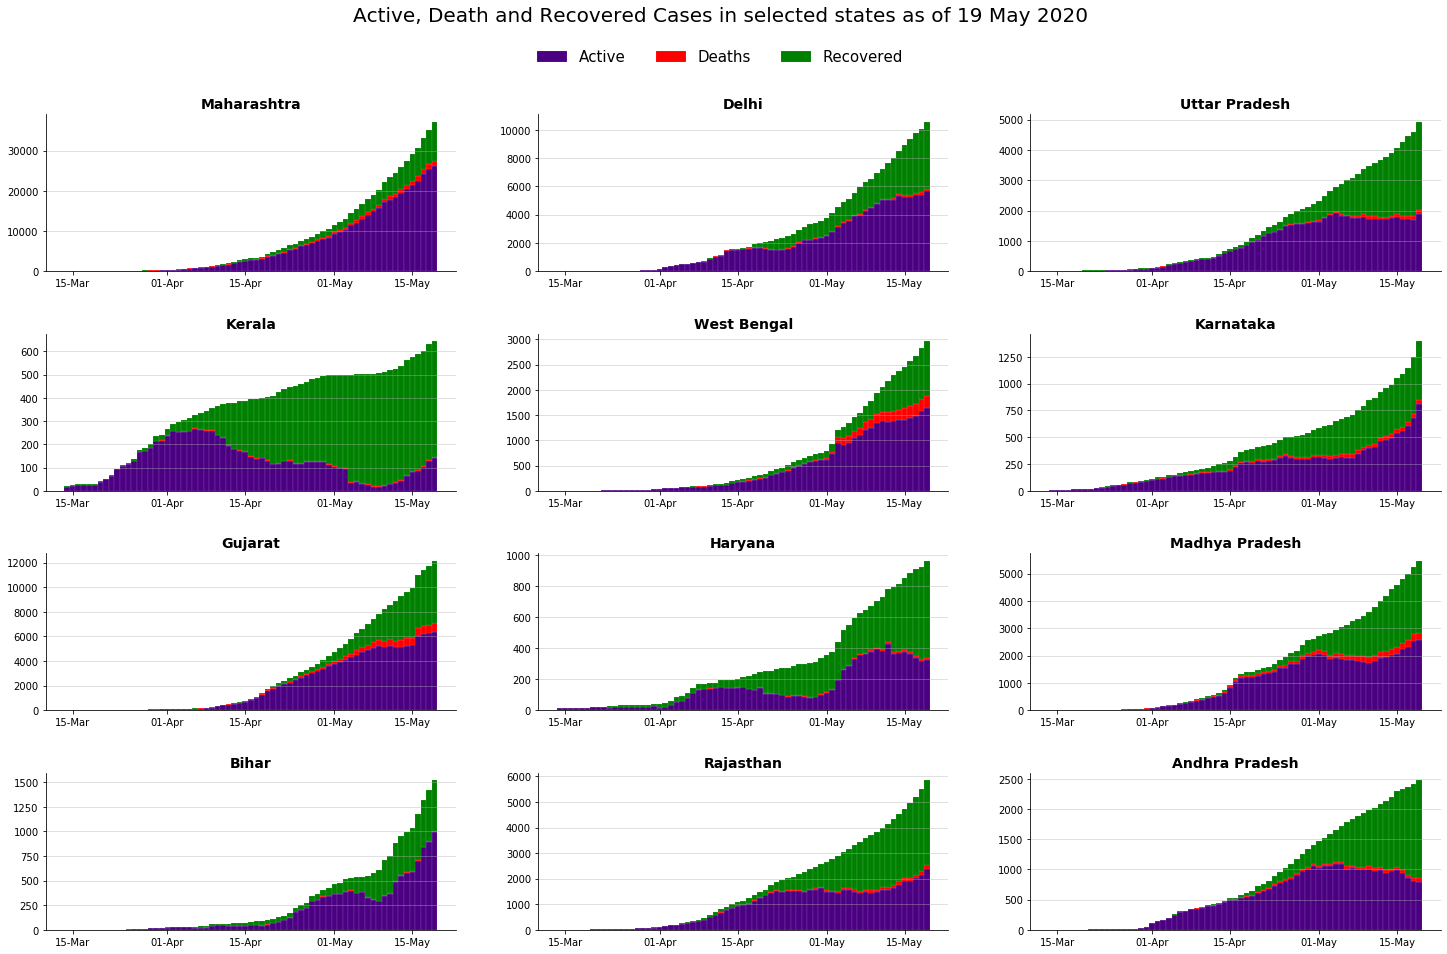

In [11]:
PlotStatesADRData(list_of_states)